# Make Figure 3: Blue f410-f466  stars on the brick 

In [1]:
cd /orange/adamginsburg/jwst/brick/

/blue/adamginsburg/adamginsburg/jwst/brick


Based on files in catalogs/

In [2]:
ls -lh catalogs/crowdsource_nsky0_merged-reproject_photometry_tables_merged.fits

-rw-r--r-- 1 adamginsburg adamginsburg 466M Jul 24 13:14 catalogs/crowdsource_nsky0_merged-reproject_photometry_tables_merged.fits


which comes from

In [3]:
ls -lh */*_merged-reproject_crowdsource_nsky0.fits

-rw-r--r-- 1 adamginsburg adamginsburg 57M Jul  5 17:10 F182M/f182m_merged-reproject_crowdsource_nsky0.fits
-rw-r--r-- 1 adamginsburg adamginsburg 33M Jul  5 16:53 F187N/f187n_merged-reproject_crowdsource_nsky0.fits
-rw-r--r-- 1 adamginsburg adamginsburg 39M Jul  9 16:06 F212N/f212n_merged-reproject_crowdsource_nsky0.fits
-rw-r--r-- 1 adamginsburg adamginsburg 15M Jul  3 14:31 F405N/f405n_merged-reproject_crowdsource_nsky0.fits
-rw-r--r-- 1 adamginsburg adamginsburg 16M Jul  3 14:28 F410M/f410m_merged-reproject_crowdsource_nsky0.fits
-rw-r--r-- 1 adamginsburg adamginsburg 12M Jul  3 14:26 F466N/f466n_merged-reproject_crowdsource_nsky0.fits


In [4]:
%matplotlib inline

In [5]:
basepath = '/orange/adamginsburg/jwst/brick/'

In [6]:
import sys
if '' in sys.path:
    sys.path.remove('')

In [7]:
%run $basepath/analysis/analysis_setup.py
basetable = basetable_merged_reproject

/orange/adamginsburg/jwst/brick/analysis/analysis_setup.py:4: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  import sys, imp
/orange/adamginsburg/jwst/brick/analysis/analysis_setup.py:19: DeprecationWarning: `photutils.CircularAperture` is a deprecated alias for `photutils.aperture.CircularAperture` and will be removed in the future. Instead, please use `from photutils.aperture import CircularAperture` to silence this warning.
  from photutils import CircularAperture, EPSFBuilder, find_peaks, CircularAnnulus
/orange/adamginsburg/jwst/brick/analysis/analysis_setup.py:19: DeprecationWarning: `photutils.EPSFBuilder` is a deprecated alias for `photutils.psf.EPSFBuilder` and will be removed in the future. Instead, please use `from photutils.psf import EPSFBuilder` to silence this warning.
  from photutils import CircularAperture, EPSFBuilder, find_peaks, CircularAnnulus
/orange/adamginsburg/jwst/brick/analysis/a

For module nrca catalog crowdsource_nsky0_nrca_photometry_tables_merged.fits, mod date is 2023-07-24 22:14:49
For module nrcb catalog crowdsource_nsky0_nrcb_photometry_tables_merged.fits, mod date is 2023-07-25 01:59:18
For module merged catalog crowdsource_nsky0_merged_photometry_tables_merged.fits, mod date is 2023-07-24 18:40:37
For module merged-reproject catalog crowdsource_nsky0_merged-reproject_photometry_tables_merged.fits, mod date is 2023-07-24 13:14:06


In [8]:
%run $basepath/analysis/selections.py --module=merged-reproject
assert len(basetable) == len(basetable_merged_reproject)
assert 'blue_410m405_466' in locals()

/orange/adamginsburg/jwst/brick/analysis/selections.py:17: DeprecationWarning: `photutils.CircularAperture` is a deprecated alias for `photutils.aperture.CircularAperture` and will be removed in the future. Instead, please use `from photutils.aperture import CircularAperture` to silence this warning.
  from photutils import CircularAperture, EPSFBuilder, find_peaks, CircularAnnulus
/orange/adamginsburg/jwst/brick/analysis/selections.py:17: DeprecationWarning: `photutils.EPSFBuilder` is a deprecated alias for `photutils.psf.EPSFBuilder` and will be removed in the future. Instead, please use `from photutils.psf import EPSFBuilder` to silence this warning.
  from photutils import CircularAperture, EPSFBuilder, find_peaks, CircularAnnulus
/orange/adamginsburg/jwst/brick/analysis/selections.py:17: DeprecationWarning: `photutils.find_peaks` is a deprecated alias for `photutils.detection.find_peaks` and will be removed in the future. Instead, please use `from photutils.detection import find_p

For module nrca catalog crowdsource_nsky0_nrca_photometry_tables_merged.fits, mod date is 2023-07-24 22:14:49
For module nrcb catalog crowdsource_nsky0_nrcb_photometry_tables_merged.fits, mod date is 2023-07-25 01:59:18
For module merged catalog crowdsource_nsky0_merged_photometry_tables_merged.fits, mod date is 2023-07-24 18:40:37
For module merged-reproject catalog crowdsource_nsky0_merged-reproject_photometry_tables_merged.fits, mod date is 2023-07-24 13:14:06
Selecting module merged-reproject

NRCA
612 saturated in near_saturated_f212n_f212n
26 saturated in near_saturated_f466n_f466n
58 saturated in near_saturated_f405n_f405n
278 saturated in near_saturated_f187n_f187n
2757 saturated in near_saturated_f182m_f182m
4122 near saturated out of 295443.  That leaves 291321 not near unsaturated
70 saturated in replaced_saturated_f212n
10 saturated in replaced_saturated_f466n
30 saturated in replaced_saturated_f405n
19 saturated in replaced_saturated_f187n
117 saturated in replaced_saturat

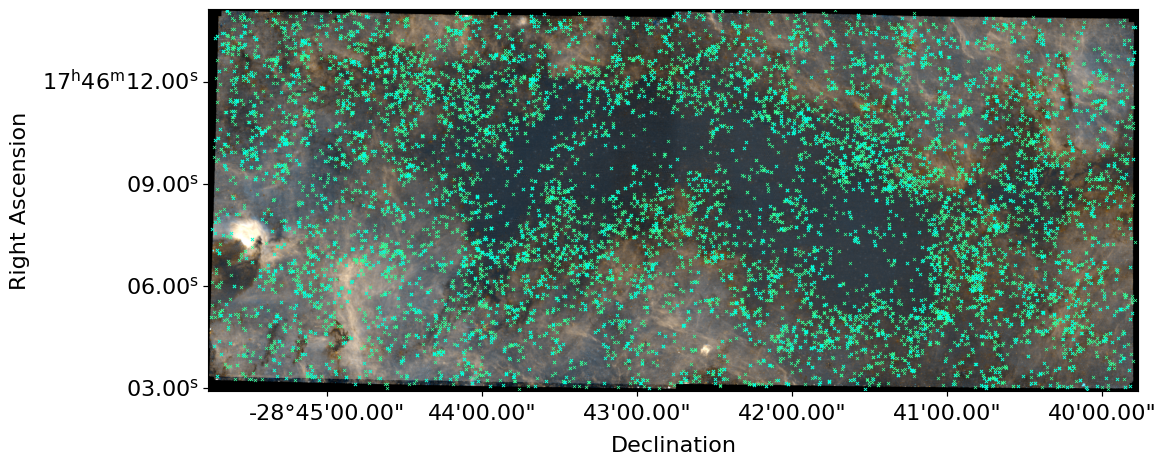

In [9]:
avm = pyavm.AVM.from_image(f'{basepath}/images/BrickJWST_merged_longwave_narrowband_rotated_lighter.png')
img_narrow = np.array(PIL.Image.open(f'{basepath}/images/BrickJWST_merged_longwave_narrowband_rotated_lighter.png'))
wwi_narrow = wcs.WCS(fits.Header.fromstring(avm.Spatial.FITSheader))

wwi_narrow = wwi_narrow.sub([2,1])

fig = pl.figure(figsize=(12,12))
ax = pl.subplot(projection=wwi_narrow)
ax.imshow(img_narrow)

crds = basetable['skycoord_f410m']
ax.scatter(
    crds.dec[blue_410m405_466 & ~badblue],
    crds.ra[blue_410m405_466 & ~badblue],
    transform=ax.get_transform('world'),
    marker='x', facecolors=(0.2, 1, 0.6),
    linewidths=0.5,
    s=5,
);
ax.scatter(
    crds.dec[veryblue_410m405_466 & ~badblue],
    crds.ra[veryblue_410m405_466 & ~badblue],
    transform=ax.get_transform('world'),
    marker='x', facecolors=(0.0, 1, 0.9),
    linewidths=0.5,
    s=5,
);
#ax.scatter(crds.ra[blue_410m405_405], crds.dec[blue_410m405_405], edgecolors='orange', facecolors='none', transform=ax.get_transform('world'))
ax.coords['ra'].set_axislabel('Right Ascension')
ax.coords['dec'].set_axislabel('Declination')

ax.set_ylim(ax.get_ylim()[::-1])

ra = lon = ax.coords['ra']
dec = lat = ax.coords['dec']
ra.set_major_formatter('hh:mm:ss.ss')
dec.set_major_formatter('dd:mm:ss.ss')
#lon.set_ticks(spacing=30. * u.arcsec, color='red')
#lat.set_ticks(spacing=30. * u.arcsec, color='blue')
#lon.set_ticklabel(color='red')
#lat.set_ticklabel(color='blue')
#lon.grid(color='red')
#lat.grid(color='blue')

ra.set_ticks_position('l')
ra.set_ticklabel_position('l')
ra.set_axislabel_position('l')
dec.set_ticks_position('b')
dec.set_ticklabel_position('b')
dec.set_axislabel_position('b')
fig.savefig(f"{basepath}/paper_figures/BlueStars_on_RGB_merged.png", bbox_inches='tight')

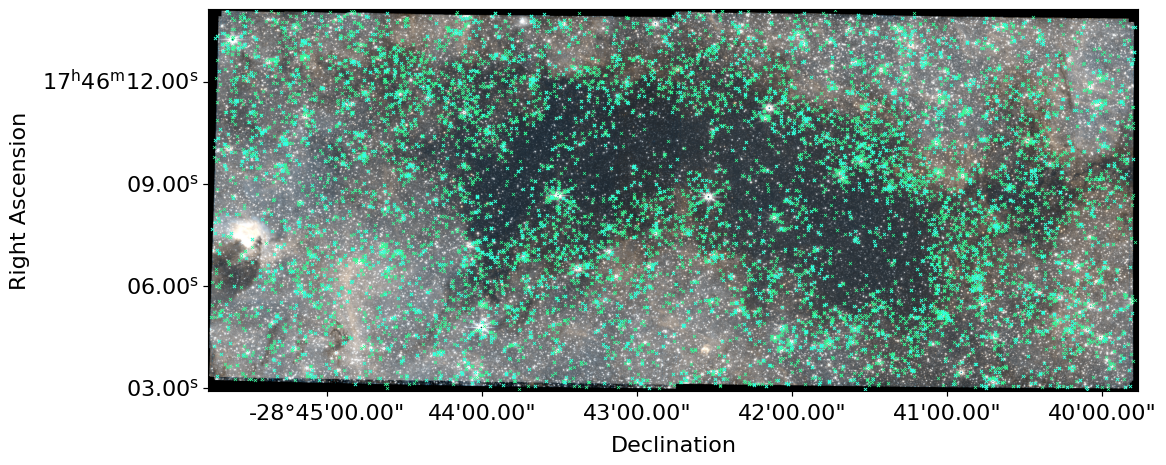

In [10]:
# This image shows only H-alpha stars
#avm = pyavm.AVM.from_image(f'{basepath}/images/BrickJWST_merged_longwave_narrowbandplusstars_rotated.png')
#img_narrow = np.array(PIL.Image.open(f'{basepath}/images/BrickJWST_merged_longwave_narrowbandplusstars_rotated.png')).swapaxes(0,1)
avm = pyavm.AVM.from_image(f'{basepath}/images/BrickJWST_merged_longwave_narrowband_rotated_withstars.png')
img_narrow = np.array(PIL.Image.open(f'{basepath}/images/BrickJWST_merged_longwave_narrowband_rotated_withstars.png'))
#wwi_bra_410 = avm.to_wcs(use_full_header=True)
wwi_narrow = wcs.WCS(fits.Header.fromstring(avm.Spatial.FITSheader))

img_narrow = img_narrow
wwi_narrow = wwi_narrow.sub([2,1])

fig = pl.figure(figsize=(12,12))
ax = pl.subplot(projection=wwi_narrow)
ax.imshow(img_narrow)

crds = basetable['skycoord_f410m']
ax.scatter(
    crds.dec[blue_410m405_466 & ~badblue],
    crds.ra[blue_410m405_466 & ~badblue],
    transform=ax.get_transform('world'),
    marker='x', facecolors=(0.2, 1, 0.6),
    linewidths=0.5,
    s=5,
);
ax.scatter(
    crds.dec[veryblue_410m405_466 & ~badblue],
    crds.ra[veryblue_410m405_466 & ~badblue],
    transform=ax.get_transform('world'),
    marker='x', facecolors=(0.2, 1, 0.9),
    linewidths=0.5,
    s=5,
);
#ax.scatter(crds.ra[blue_410m405_405], crds.dec[blue_410m405_405], edgecolors='orange', facecolors='none', transform=ax.get_transform('world'))
ax.coords['ra'].set_axislabel('Right Ascension')
ax.coords['dec'].set_axislabel('Declination')

ax.set_ylim(ax.get_ylim()[::-1])

ra = lon = ax.coords['ra']
dec = lat = ax.coords['dec']
ra.set_major_formatter('hh:mm:ss.ss')
dec.set_major_formatter('dd:mm:ss.ss')
#lon.set_ticks(spacing=30. * u.arcsec, color='red')
#lat.set_ticks(spacing=30. * u.arcsec, color='blue')
#lon.set_ticklabel(color='red')
#lat.set_ticklabel(color='blue')
#lon.grid(color='red')
#lat.grid(color='blue')

ra.set_ticks_position('l')
ra.set_ticklabel_position('l')
ra.set_axislabel_position('l')
dec.set_ticks_position('b')
dec.set_ticklabel_position('b')
dec.set_axislabel_position('b')
fig.savefig(f"{basepath}/paper_figures/BlueStars_on_RGB_stars_merged.png", bbox_inches='tight')

### Blue F410-F466 stars: w/o 410m405

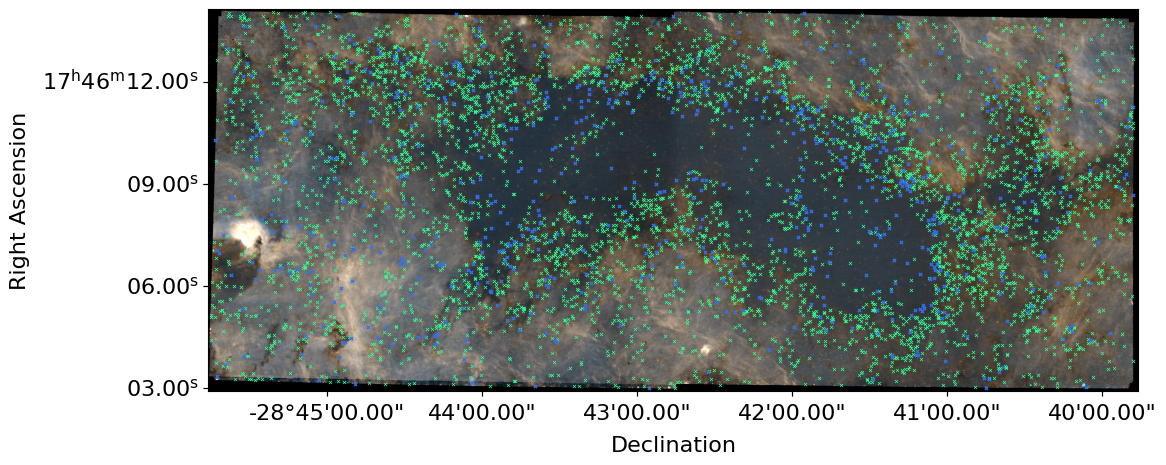

In [11]:
avm = pyavm.AVM.from_image(f'{basepath}/images/BrickJWST_merged_longwave_narrowband_rotated_lighter.png')
img_narrow = np.array(PIL.Image.open(f'{basepath}/images/BrickJWST_merged_longwave_narrowband_rotated_lighter.png'))
wwi_narrow = wcs.WCS(fits.Header.fromstring(avm.Spatial.FITSheader))

wwi_narrow = wwi_narrow.sub([2,1])

fig = pl.figure(figsize=(12,12))
ax = pl.subplot(projection=wwi_narrow)
ax.imshow(img_narrow)

crds = basetable['skycoord_f410m']
ax.scatter(
    crds.dec[blue_410_466 & ~badblue],
    crds.ra[blue_410_466 & ~badblue],
    transform=ax.get_transform('world'),
    marker='x', facecolors=(0.2, 1, 0.6),
    linewidths=0.5,
    s=5,
);

ax.scatter(
    crds.dec[veryblue_410_466 & ~badblue],
    crds.ra[veryblue_410_466 & ~badblue],
    transform=ax.get_transform('world'),
    marker='x', facecolors=(0.2, 0.4, 1.0),
    linewidths=0.8,
    s=5,
);

#ax.scatter(crds.ra[blue_410_405], crds.dec[blue_410_405], edgecolors='orange', facecolors='none', transform=ax.get_transform('world'))
ax.coords['ra'].set_axislabel('Right Ascension')
ax.coords['dec'].set_axislabel('Declination')

ax.set_ylim(ax.get_ylim()[::-1])

ra = lon = ax.coords['ra']
dec = lat = ax.coords['dec']
ra.set_major_formatter('hh:mm:ss.ss')
dec.set_major_formatter('dd:mm:ss.ss')
#lon.set_ticks(spacing=30. * u.arcsec, color='red')
#lat.set_ticks(spacing=30. * u.arcsec, color='blue')
#lon.set_ticklabel(color='red')
#lat.set_ticklabel(color='blue')
#lon.grid(color='red')
#lat.grid(color='blue')

ra.set_ticks_position('l')
ra.set_ticklabel_position('l')
ra.set_axislabel_position('l')
dec.set_ticks_position('b')
dec.set_ticklabel_position('b')
dec.set_axislabel_position('b')
fig.savefig(f"{basepath}/paper_figures/BlueStars_on_RGB_merged_410-466.png", bbox_inches='tight')

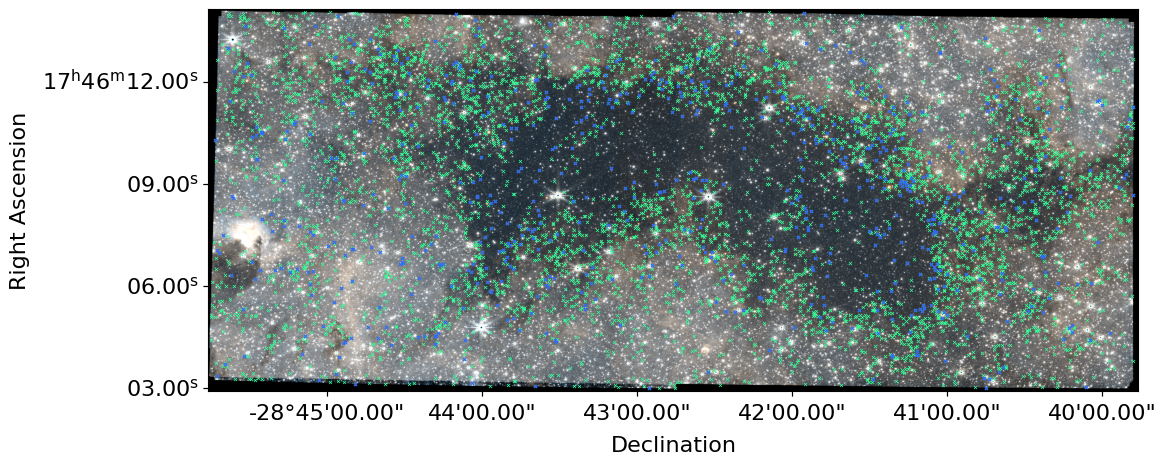

In [12]:
# This image shows only H-alpha stars
#avm = pyavm.AVM.from_image(f'{basepath}/images/BrickJWST_merged_longwave_narrowbandplusstars_rotated.png')
#img_narrow = np.array(PIL.Image.open(f'{basepath}/images/BrickJWST_merged_longwave_narrowbandplusstars_rotated.png')).swapaxes(0,1)
avm = pyavm.AVM.from_image(f'{basepath}/images/BrickJWST_merged_longwave_narrowband_rotated_withstars.png')
img_narrow = np.array(PIL.Image.open(f'{basepath}/images/BrickJWST_merged_longwave_narrowband_rotated_withstars.png'))
#wwi_bra_410 = avm.to_wcs(use_full_header=True)
wwi_narrow = wcs.WCS(fits.Header.fromstring(avm.Spatial.FITSheader))

img_narrow = img_narrow
wwi_narrow = wwi_narrow.sub([2,1])

fig = pl.figure(figsize=(12,12))
ax = pl.subplot(projection=wwi_narrow)
ax.imshow(img_narrow)

crds = basetable['skycoord_f410m']
ax.scatter(
    crds.dec[blue_410_466 & ~badblue],
    crds.ra[blue_410_466 & ~badblue],
    transform=ax.get_transform('world'),
    marker='x', facecolors=(0.2, 1, 0.6),
    linewidths=0.5,
    s=5,
);
ax.scatter(
    crds.dec[veryblue_410_466 & ~badblue],
    crds.ra[veryblue_410_466 & ~badblue],
    transform=ax.get_transform('world'),
    marker='x', facecolors=(0.2, 0.4, 1.0),
    linewidths=0.8,
    s=5,
);
#ax.scatter(crds.ra[blue_410_405], crds.dec[blue_410_405], edgecolors='orange', facecolors='none', transform=ax.get_transform('world'))
ax.coords['ra'].set_axislabel('Right Ascension')
ax.coords['dec'].set_axislabel('Declination')

ax.set_ylim(ax.get_ylim()[::-1])

ra = lon = ax.coords['ra']
dec = lat = ax.coords['dec']
ra.set_major_formatter('hh:mm:ss.ss')
dec.set_major_formatter('dd:mm:ss.ss')
#lon.set_ticks(spacing=30. * u.arcsec, color='red')
#lat.set_ticks(spacing=30. * u.arcsec, color='blue')
#lon.set_ticklabel(color='red')
#lat.set_ticklabel(color='blue')
#lon.grid(color='red')
#lat.grid(color='blue')

ra.set_ticks_position('l')
ra.set_ticklabel_position('l')
ra.set_axislabel_position('l')
dec.set_ticks_position('b')
dec.set_ticklabel_position('b')
dec.set_axislabel_position('b')
fig.savefig(f"{basepath}/paper_figures/BlueStars_on_RGB_stars_merged_410-466.png", bbox_inches='tight')